Here we request sensor history from the API and view the data in a dataframe

todo: explain 'fields' in request body

In [4]:
%matplotlib inline
import requests
import pandas as pd
import io
import json


api_key = '<yourkey>'
thing_id= '<thingID>'

url = "https://api.disruptive-technologies.com/v1/things/{thing_id}/aggregate".format(thing_id=thing_id)
headers = {
    'Authorization': 'ApiKey {api_key}'.format(api_key=api_key),
    'Cache-Control': 'no-cache',
    'Content-Type': 'application/json',
}
body = {}
body['interval'] = '1s'
body['time_period'] = {
'start': '2017-01-01T00:01:00Z',
'end': '2099-12-31T20:00:00Z'
}
body['fields'] = []
body['fields'].append(
{
   'name': "temperature",
   'function': 2
}
)

print(url)

print(body)

https://api.disruptive-technologies.com/v1/things/206864770/aggregate
{'interval': '1s', 'time_period': {'start': '2017-01-01T00:01:00Z', 'end': '2099-12-31T20:00:00Z'}, 'fields': [{'name': 'temperature', 'function': 2}]}


In [3]:
jsonData = requests.post(url, headers=headers, data=json.dumps(body)).json()
normalized = pd.io.json.json_normalize(jsonData['values'])
df = pd.DataFrame.from_dict(normalized)
df['time'] = pd.to_datetime(df['time'], errors='coerce').fillna(0)
df['DISTINCT_TEMPERATURE'] = pd.to_numeric(df['DISTINCT_TEMPERATURE'], errors='coerce')
df.set_index('time', inplace=True)

In [4]:
df.describe()

,DISTINCT_TEMPERATURE
count,1000.000000
mean,23.683000
std,1.032268
min,21.000000
25%,24.000000
50%,24.000000
75%,24.000000
max,28.000000


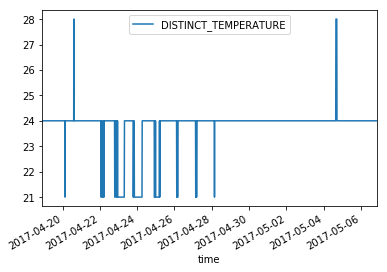

In [5]:
df.plot()

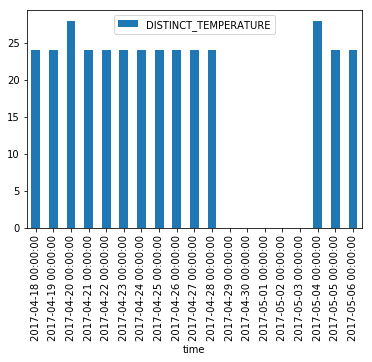

In [9]:
# Group the data by month, and take the mean for each group (i.e. each month)
df.resample('D').max().plot(kind="bar")